### Numerical tests of ground state energy eigenfunction for the infinite square well potential
 This is an example of taking a python script and converting it to a jupyter notebook.
 
 Documentation for jupyter can be found at http://jupyter.org/index.html, including an [introduction to jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/What%20is%20the%20Jupyter%20Notebook.html).
 
 
The original script (at the end of the notebook) was given to PHY-20006 students as an example on which to base their answers to a problem sheet question.

This cell of the notebook is written in _markdown_ format. Double click on the cell to see the underlying rich-text markup 
language.

Cells can be executed using the commands in the menu at the top of the notebook, or by using the keyboard short-cut *Shift-Enter*.

The following ["magic"](http://ipython.readthedocs.io/en/stable/interactive/magics.htm) handles the import commands for numpy and matplotlib.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


 Physical constants in SI units from Math's handbook


In [2]:
hbar = 1.055e-34  # Planck's constant / 2.pi
a_0  = 5.292e-11  # Bohr radius
m_e  = 9.109e-31  # Electron mass
eV  =  1.602e-19  # Electron volts

Analysing $\psi_1$, $n=1$ ground state for a particle trapped in a region of $a$.


The 1-D time-independent Schrodinger equation (*TISE*) is  

\begin{equation}
\frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x) \psi = E \psi
\end{equation}

In this case we take $V(x)= 0$ in the region  $0<x<a$, in which case the ground state solution of the TISE is 

\begin{equation}
 \psi_1 = \sqrt{\frac{2}{a}}\sin\left(\frac{\pi x}{a}\right)
\end{equation}

### Parameters for the calculation

In [3]:
# N.B. all numpy functions have were imported by the "pylab" magic statement at the top
n_grid = 9999  # Do calculation on a grid of n_grid values.
a = 4.32 * a_0  # Random value of well width a relative to Bohr radius
m = 2.33 * m_e  # Random values of particle mass relative to electron mass
n = 1
print("a = ",a/a_0, "a_0")
print("m = ",m/m_e, "m_e")
print("Grid size: ",n_grid)

a =  4.32 a_0
m =  2.33 m_e
Grid size:  9999


### Define a function for $\psi_1$
 Note that all numpy functions are imported by the pylab magic above, so we can use "sqrt" instead of "np.sqrt", etc.
 

In [4]:
def psi(x, a, n=1):
  norm = sqrt(2/a) # Normalisation factor
  v = array(norm * sin(n*pi*x/a)) 
  return v


### Grid of $x$ values
Exclude points at the boundaries where some functions may not be defined

In [5]:
grid_step = a/(n_grid+1)
x_grid = linspace(1,n_grid,n_grid) * grid_step

### Grid of  $\psi_1$ values


In [6]:
psi_grid = psi(x_grid, a, n=n)


### Plot of $\psi_1$
Not asked for in the original question, but very easy to do in a notebook

(0, 102885.90731550295)

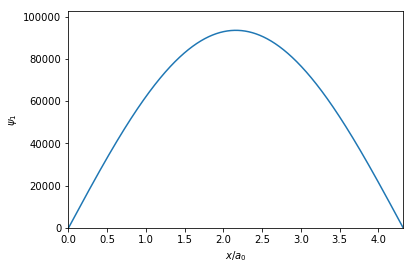

In [7]:
plot(x_grid/a_0,psi_grid)
xlabel('$x/a_0$')
ylabel('$\psi_1$')
xlim(0,a/a_0)
ylim(0,1.1*max(psi_grid))

### Test that $\psi_1$ is normalized
$\psi_1$ is real so $|\psi_1^*\psi_1| = \psi_1^2$.

 The function used to do the numerical integration is *trapz*. You can see how to use this function by opening the cell below (double-click), placing the cursor inside the between "trapz(" and ")" and using the keyboard short-cut *SHIFT-TAB*.

In [8]:
integrand = psi_grid**2
test1 = trapz(integrand,x_grid)  # To see the how this function works, open t
print('Normalisation test = {:0.4f} (should be close to 1)'.format(test1))

Normalisation test = 1.0000 (should be close to 1)


### Calculate probability to observe in first quarter of the well


In [9]:
first_quarter = (x_grid < 0.25*a) 
test2 = np.trapz(integrand[first_quarter],x_grid[first_quarter])
print('P(x < a/4) = {:0.4f} '.format(test2))
# Here we can check this against the calculated value
truth2 = 0.25 -0.5/pi 
print('Expected value of P(x < a/4) = {:0.4f} '.format(truth2))

P(x < a/4) = 0.0907 
Expected value of P(x < a/4) = 0.0908 


### Calculate expectation value for $x$, $\langle x \rangle$


In [10]:
integrand = psi_grid*x_grid*psi_grid
test3 = np.trapz(integrand,x_grid)  # integral y(x)dx = trapz(y,x)
print('Expectation value <x> = {:0.4f} a_0 '.format(test3/a_0))


Expectation value <x> = 2.1600 a_0 


### Plot of $\psi^2$
 ... so we can see if the answers above looks reasonable

(0, 9623190840.122057)

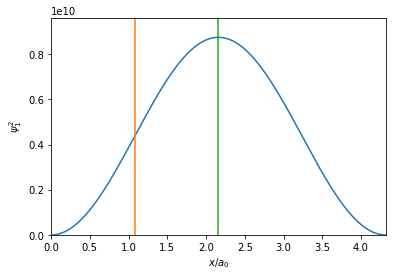

In [11]:
plot(x_grid/a_0,psi_grid**2)
ytop = 1.1*max(psi_grid**2)
plot(array([0.25*a/a_0,0.25*a/a_0]),array([0,ytop]))
plot(array([test3/a_0,test3/a_0]),array([0,ytop]))

xlabel('$x/a_0$')
ylabel('$\psi_{}^2$'.format(n))
xlim(0,a/a_0)
ylim(0,ytop)

### Test time-independent Schrodinger equation and hence derive energy



In [12]:
del2psi = np.gradient(np.gradient(psi_grid,grid_step),grid_step) 

# Explicitly using potential V(x)=0 here so we know how to put in non-zero potentials later
V = np.zeros(n_grid) 

# Left-hand side of TISE
lhs = -hbar**2/(2*m)*del2psi + V*psi_grid

# Divide LHS by u to get E
# CAREFUL - must avoid points where psi is close to zero
where_not_zero = (abs(psi_grid) >  1e-6 )  # List of true/false values
E_grid = lhs[where_not_zero]/psi_grid[where_not_zero]


Every point in E_grid should give the same value for E (+/- some numerical noise) but there may be a few points where the calculation is affected by numerical problems, so use the median value to get a robust estimate for the  typical value of E. Also print the mean absolute deviation to check that the energy derived is consistent for all valis values in the grid.


In [14]:
E = np.median(E_grid)              # Take median - more robust than average
E_err = np.median(np.abs((E_grid-E))) # Should be close to 0 for valid solution

#Report results in eV
print("Numerical calculation: E = {:0.4f} +/- {:0.4f} eV".format(E/eV,E_err/eV))

# Expected value of energy
E_expected  = n**2*pi**2*hbar**2/(2*m*a**2)
print("Expected value: E = {:0.4f} eV".format(E_expected/eV))




Numerical calculation: E = 3.0909 +/- 0.0000 eV
Expected value: E = 3.0909 eV


### The original script

In [15]:
# Numerical tests of solutions to T.I.S.E.
# By Pierre Maxted, Nov. 2017
from __future__ import (print_function) # So print() works in python 2.7
from math import sqrt, pi
import numpy as np

# Physical constants in SI units from Math's handbook
hbar = 1.055e-34  # Planck's constant / 2.pi
a_0  = 5.292e-11  # Bohr radius
m_e  = 9.109e-31  # Electron mass
eV  =  1.602e-19  # Electron volts

# Ground state of infinite square well potential, 0<x<a
def psi_1(x,a):
  norm = sqrt(2/a) # Normalisation factor
  v = np.array(norm * np.sin(pi*x/a))  # x is an array, so use np.sin
  return v

# Start
n_grid = 9999  # Do calculation on a grid of n_grid values.
a = 4.35 * a_0  # Random value of well width "a" relative to Bohr radius
m = 2.32 * m_e  # Random value of particle mass relative to electron mass

print("\nTest of ground state for infinite square well of width a")      
print("a = ",a/a_0, "a_0")
print("m = ",m/m_e, "m_e")
print("Grid size: ",n_grid)

# Grid of x values
# Exclude points at the boundaries where some functions may not be defined
grid_step = a/(n_grid+1) 
x_grid = np.linspace(1,n_grid,n_grid) * grid_step

# Test that psi_1 is normalised
# psi_1 is real so |psi_1^* psi_1| = psi_1^2
psi_1_grid = psi_1(x_grid, a)
integrand = psi_1_grid**2
test1 = np.trapz(integrand,x_grid)  # integral y(x)dx = trapz(y,x)
print('Normalisation test = {:0.4f} (should be close to  1.0)'.format(test1))

# Calculate probability to observe in first quarter of the well
first_quarter = (x_grid < 0.25*a) 
test2 = np.trapz(integrand[first_quarter],x_grid[first_quarter])
print('P(x < a/4) = {:0.4f} '.format(test2))
# Here we can check this against the calculated value
truth2 = 0.25 -0.5/pi 
print('Expected value of P(x < a/4) = {:0.4f} '.format(truth2))

# Test expectation value for x
integrand = psi_1_grid*x_grid*psi_1_grid
test3 = np.trapz(integrand,x_grid)  # integral y(x)dx = trapz(y,x)
print('Expectation value <x> = {:0.4f} a_0 '.format(test3/a_0))

# Test time-independent Schrodinger equation and hence derive energy
# TISE:  -hbar^2/2m d^2psi/dx^2 + V(x)*psi = E*psi
# df/dx = gradient(f,grid_step) for regular grid of f(x) values
del2psi = np.gradient(np.gradient(psi_1_grid,grid_step),grid_step) 

# Potential (V(x)=0)
V = np.zeros(n_grid) 

# Left-hand side of TISE
lhs = -hbar**2/(2*m)*del2psi + V*psi_1_grid

# Divide LHS by psi to get E avoiding points where psi_1 is close to zero
where_psi_not_zero = (abs(psi_1_grid) > 1e-6)  # List of true/false values
E_grid = lhs[where_psi_not_zero]/psi_1_grid[where_psi_not_zero]
E = np.median(E_grid)              # Take median - more robust than average
E_err = np.median(np.abs((E_grid-E))) # median absolute deviation

# Report results in eV
print("Energy E = {:0.4f} +/- {:0.4f} eV".format(E/eV,E_err/eV))
E_expected  = pi**2*hbar**2/(2*m*a**2)
print("Expected value: E = {:0.4f} eV".format(E_expected/eV))
print("--")



Test of ground state for infinite square well of width a
a =  4.35 a_0
m =  2.32 m_e
Grid size:  9999
Normalisation test = 1.0000 (should be close to  1.0)
P(x < a/4) = 0.0907 
Expected value of P(x < a/4) = 0.0908 
Expectation value <x> = 2.1750 a_0 
Energy E = 3.0615 +/- 0.0000 eV
Expected value: E = 3.0615 eV
--


&copy; Pierre Maxted, Keele University, 2017